<a href="https://colab.research.google.com/github/yujiimt/time_series/blob/master/%E6%99%82%E7%B3%BB%E5%88%97%E8%A7%A3%E6%9E%90_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 時系列データでのデータ変換

対数系列 
分散を一様に近づけることができる。
誤差分布がほぼ正規分布とみなせることがある
ばらつきの大きな原系列データを定常性の仮定したデータに変換することができる

差分系列
原系列が顕著なトレンドを含む場合は、差分系列が有効であることが多い
差分をとることでトレンドを消すことができる
単位根過程に従うデータに差分系列は定常過程になる

対数差分系列
時系列データの変化率に興味がある場合に用いられる




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
file = '/m_quote.csv'
df_historical = pd.read_csv(file)

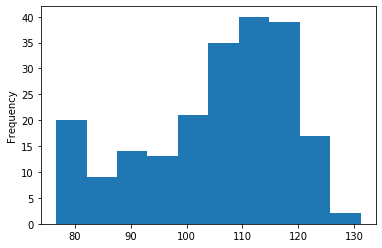

In [0]:
df_historical.USD.plot.hist()

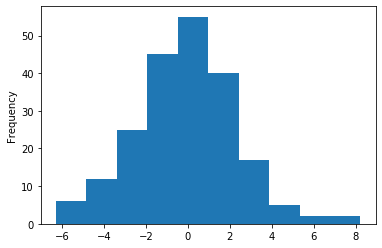

In [4]:
df_diff1 = df_historical.USD.diff().dropna()
df_diff1.plot.hist()

In [6]:
import scipy.stats as stats

#原系列の Shapiro-Wilk 検定
print(stats.shapiro(df_historical.USD.values))
#1次階差系列のshapiro-wilk検定
print(stats.shapiro(df_diff1.values))

(0.9285839200019836, 1.3863219905374535e-08)
(0.9900259971618652, 0.1574745774269104)


(W統計量, p値)

## 時間依存性の発見(自己相関の検定)

時系列データの各時点間での依存関係を時間不変性    
定常性と呼ばれる概念。なにを不変とするのあkによって    
弱定常性と強定常性の２つに分類される   
定常性の仮定の下で、基礎的な時系列をもとに、複雑なモデルが構築される   
時間差を考慮した自分自身との相関関係を自己相関関係と呼び、   
自己相関関係をもとに計算した相関係数を自己相関係数と呼ぶ   

時間差の度合いをラグ(lag)と呼ぶ   
k時点ずらして計測した自己相関係数をラグkの自己相関係数と呼ぶ   



In [0]:
import io
import requests
import statsmodels.api as sm

url = 'https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv'
stream = requests.get(url).content
df_content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
passengers = df_content['#Passengers']

In [5]:
#自己相関係数を計算する

p_acf = sm.tsa.stattools.acf(passengers)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [6]:
p_acf

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

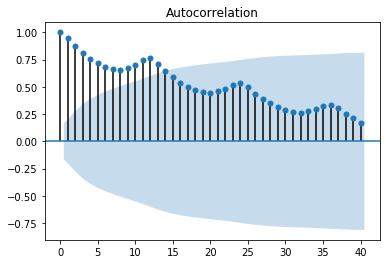

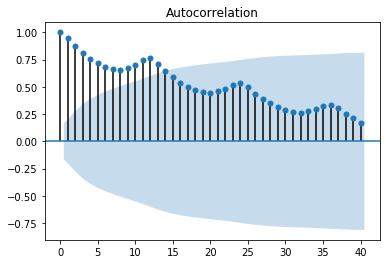

In [7]:
sm.graphics.tsa.plot_acf(passengers, lags = 40)

自己相関係数の計算ではラグ１の積み重ねによる間接的な関係が含まれている、ラグ１の自己相関関係がある場合   

・今月の値には先月の値が関係する   
・先月の値には先々月の値が関係する    
・したがって、今月の値には先々月の値が関係する   

推移関係が成り立つ   
推移関係を排除した自己相関係数を偏自己相関と呼ぶ

In [0]:
# 偏自己相関 ols は最小二乗法による推定を意味する

p_pacf = sm.tsa.stattools.pacf(passengers, nlags = 40, method = 'ols')

In [15]:
p_pacf

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

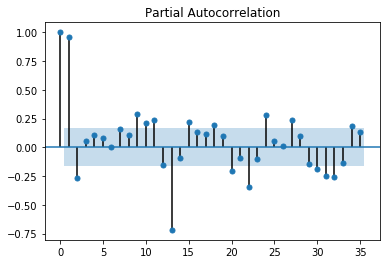

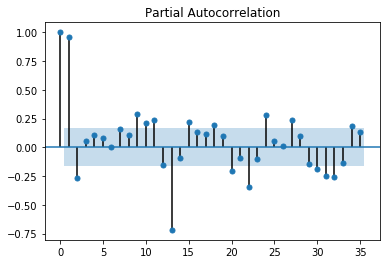

In [17]:
sm.graphics.tsa.plot_pacf(passengers, lags = 35)

## 定常性

時間不変性を調べることは、いわばデータの並び順に意味を見出すこと   
したがって、データのならび順を考慮せず、データが独立に抽出された標本という前提条件にもとづいた手法では、時間依存の関係を調査することはできない   
時間依存性を考慮して時系列データを分析するこためには、どのような前提を立てるべきなのか。   

例えば時点tにおける時系列データy_tのの期待値を推定した場合、各時点での平均での平均が等しいという前提を追手に置いていないため標本平均を採用することはできない。これは分散についても同様のことがいえる。   
また、時点を固定して繰り返しデータを観測することもできない。   
それでは、時系列データが同一の分布からの独立抽出した標本である。という仮定を置いた場合はどうか。この場合、データの並び順に関係性がなくなってしまうため、時間依存関係を考えることができなくなる。そこで、時系列データが同一の分布に従うという条件をもとに、寺家入れ時系列データ分析に適した前提条件を考えることになる。その時系列データ解析に適した前提条件を満たす確率過程には弱定常性と強定常性の２つがある。それぞれ平均、分散、自己共分散の３つの統計量において以下の前提条件を満たす    

弱定常性
・平均が一定   
・分散が一定   
・自己共分散はラグkのみに依存する

強定常性   
任意のtとkに対して(y_t + 1)Tの同時分布が同一である

弱定常性の定義をみると、自己共分散は時点には依存せずに時間差kのみに依存することがわかる。また弱定常性を満たすとき、自己相関も時点に依存しなくなる。次に、強定常性の条件をみると、当該性質は同時分布が不変であることを要求している   
各時点に同時分布が等しいことが条件となっていることがわかる   
強定常性は弱定常性より強い概念であり、過程の分散が有限であるならば、強定常過程は、弱定常過程となる。



In [0]:
a = (1 + df_historical.USD.pct_change()).apply(np.log)

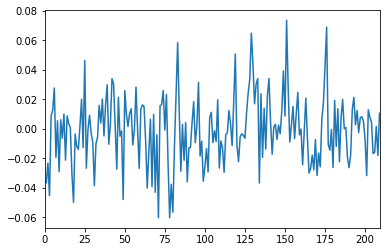

In [21]:
a.plot()

In [0]:
b = df_historical.USD.div(df_historical.USD.shift(1)) - 1

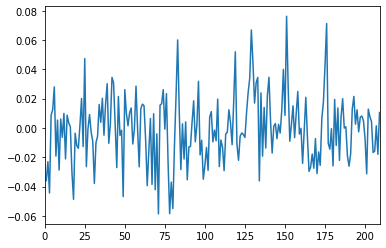

In [23]:
b.plot()

## ホワイトノイズ

定常な時系列の中でも最も簡単で重要な系列なのがホワイトノイズ   
平均0,分散が一定の値,自己共分散0となっているもの。
ホワイトノイズは弱定常過程である   


ホワイトノイズより強い仮定は、独立同分布系列(iid)
iid系列は各時点のデータが互いに独立でかつ同一の分布に従う系列   
iudは最も基礎的な強定常過程の例    
時系列モデルにおいて確率的変動を表現とする道具    
独立性や同一分布は非常に強い仮定であり、必ずしも分析に必要となるものではない   
そのため、iidより弱い仮定しか必要とせず、モデルの撹乱項として使用できる  その要求を満たすものがホワイトノイズである   
